<a href="https://colab.research.google.com/github/jjablonski-it/pjatk-mhe/blob/main/MHE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaimplementuj GA dla Twojego zadania. Jest tu sporo elementów, dlatego dopuszczam częściowe rozwiązania i każde będę oceniał indywidualnie. Niech będzie:
	
- 2 metody krzyżowania
- 2 metody mutacji
- 2 warunki zakończenia

Parametrami niech będzie - wybór metody krzyżowania, mutacji oraz warunku zakończenia. Parametrem niech będzie także liczba osobników w populacji.

## GA:
- Population
- Fitness Calculation
- Mating Pool
- Parents Selection
- Mating -> Crossover/Mutation
- Offspring

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
# constants
LENGTH = 100
VALUE_RANGE = 100000

In [3]:
data = [random.randint(-VALUE_RANGE,VALUE_RANGE) for _ in range(LENGTH)]
# data[0] = 0
print(0 in data)

False


In [4]:
# functions
def random_index():
  return ''.join(['%d' % random.randint(0,1) for _ in range(LENGTH)])

def index_to_set(index):
  result = []
  for i, x in enumerate(list(index)):
    if(x=='1'):
      result.append(i)
  return list(map(lambda x: data[x] ,result))

def subset_sum(index):
  return abs(sum(index_to_set(index)))

def negate_bit(index, n):
  index_list = list(index)
  bit = index_list[n]
  index_list[n] = '1' if bit=='0' else '0'
  return ''.join(index_list)

def generate_neighbours(index):
  return filter(lambda x: x != '0'*LENGTH, [negate_bit(index, x) for x in range(LENGTH)])

def get_best_index(indices):
  sum_dict = {index: subset_sum(index) for index in indices}
  return min(sum_dict, key=sum_dict.get)

def plot_indices_to_sum(indices):
    plt.plot(list(map(lambda x: subset_sum(x), indices)))

def bruteforce_lowest_sum(val=0):
  all_indices = list(map(lambda x: ("{:0"+str(LENGTH)+"b}").format(x), range(1,2**LENGTH)))
  print('generated all incides, testing...')
  best = subset_sum(all_indices[0])
  for x in all_indices:
    result = subset_sum(x)
    if(result <= val): 
      return result
    if(result < best): 
      best = result
  return best

In [25]:
class GA:
  def __init__(self, pop_size, mutation_rate, crossover, mutate, end_condition, fitness_function):
    self.pop_size = pop_size
    self.mutation_rate = mutation_rate
    self.generation = self.create_generation()
    self.generation_count = 0
    self.best_index = get_best_index(self.generation)
    self.best_indices_per_gen = [self.best_index]
    self.average_sum_per_gen = [self.get_average_sum()]

    self.crossover = crossover
    self.mutate = mutate
    self.end_condition = end_condition
    self.fitness_function = fitness_function

  def next_generation(self):
    parent = self.select_parent() 
    next_generation = self.mate(parent)
    self.generation = self.create_generation(next_generation)
    self.generation_count += 1
    self.update_best_index()

  def n_next_generations(self, n):
    for _ in range(n):
      self.next_generation()
      if self.end_condition(self):
        print('found solution:', self.best_index)
        break
             
  def create_generation(self, start_array=[]):
    generation = set(start_array)
    while(len(generation) < self.pop_size):
      generation.add(random_index())
    return generation

  def mutation(self, index):
    rand = random.random()
    if rand < self.mutation_rate:
      return self.mutate(index)
    return index
      
  def select_parent(self):
    index_score_dict = {index: self.fitness_function(index) for index in self.generation}
    total = sum(index_score_dict.values())
    index_prob_dict = {index: (score/total) for i,index,score in index_score_dict.items()}
    index_prob_add = {index: sum(list(map(lambda x: x[1], index_prob_dict.items()[:i]))) for i, index in enumerate(index_prob_dict.keys())}
    print('index_prob_add',index_prob_add)

    random_value = random.random()
    # print('index_prob_dict',index_prob_dict)
    selected_index = next(key for key, value in index_prob_dict.items() if value >= random_value)
    # print('selected index', selected_index)
    # pool_nested = [[index]*(prob) for index,prob in index_prob_dict.items()]
    # pool = [item for sublist in pool_nested for item in sublist]
    # return random.choice(pool)
    sorted_neighbours = sorted(neighbour_sum_dict.items(), key=lambda item: item[1])
    if sorted_neighbours[0][1]==0:
      return sorted_neighbours[0][0]
    points_arr = [(value_range*length)//sum for _, sum in sorted_neighbours]
    total_points = sum(points_arr)
    probability_arr = list(map(lambda x: x/total_points, points_arr))

    random_val = random.random()
    best_i = next(i for i, _ in enumerate(probability_arr) if sum(probability_arr[:i+1]) > random_val)
    return sorted_neighbours[best_i][0]

  def mate(self, parent_index):
    new_generation = map(lambda index: self.mutation(self.crossover(index, parent_index)), self.generation)
    return set(new_generation)

  def update_best_index(self):
    current_best = get_best_index(self.generation)
    self.best_indices_per_gen.append(current_best)
    self.average_sum_per_gen.append(self.get_average_sum())
    if(subset_sum(current_best) < subset_sum(self.best_index)):
       self.best_index = current_best

  def get_average_sum(self):
    return sum(map(lambda index: subset_sum(index), self.generation))/len(self.generation)

  def show_status(self):
    print('generation_count', self.generation_count)
    print('average_sum', self.get_average_sum())
    print('best_sum', subset_sum(self.best_index))
    print('curr_best_sum', subset_sum(self.best_indices_per_gen[-1]))

ga = GA(10, 0.01, crossover_b, mutate_b, end_condition_a, fitness_function_a)
ga.next_generation()

TypeError: 'dict_items' object is not subscriptable

In [24]:
# variant a
def crossover_a(index_a, index_b):
  slice_point = random.randint(0, LENGTH-1)
  child = index_a[:slice_point] + index_b[slice_point:]
  return child

def mutate_a(index):
  mutation_point = random.randint(0, LENGTH-1)
  mutated_index = negate_bit(index, mutation_point)
  return mutated_index

def end_condition_a(self):
  return subset_sum(self.best_index) == 0

def fitness_function_a(index):
  index_sum = subset_sum(index)
  if(index_sum==0): return ((VALUE_RANGE*LENGTH) * 2) # twice the max amount
  score = ((VALUE_RANGE*LENGTH) // index_sum)
  return score

# varinat b
def crossover_b(index_a, index_b):
  slice_point_1, slice_point_2 = sorted([random.randint(0, LENGTH-1), random.randint(0, LENGTH-1)])
  child = index_a[:slice_point_1] + index_b[slice_point_1:slice_point_2] + index_a[slice_point_2:]
  return child

def mutate_b(index):
  rand_index = random_index()
  mutated_index = crossover_b(index, rand_index)
  return mutated_index

def end_condition_b(self):
  return subset_sum(self.best_index) == 0

def fitness_function_b(index):
  index_sum = subset_sum(index)
  if(index_sum==0): return ((VALUE_RANGE*LENGTH) * 2)**2 # twice the max amount
  score = ((VALUE_RANGE*LENGTH) // index_sum)**2
  return score

ga_a = GA(100, 0.01, crossover_a, mutate_a, end_condition_a, fitness_function_a)
ga_b = GA(100, 0.01, crossover_b, mutate_b, end_condition_b, fitness_function_b)

index_prob_dict {'1111010001010000001101111100101100110010101000001000010110100010000001010011001111010100110011100000': 0, '1010111101001100000011011111010110100001011010001010001100100111001001111110101100010110001001010101': 0, '0010010000001110101111100010010110000101001010000000100110011000000010000001000111100100010010011111': 1, '1001111001001011011010111110010011100010100010000101010010111100011001000010100111101111001110001100': 0, '1011101101010101010000011110110100101111111101000100010101001010011111101101110010101111011000011111': 0, '0111001010110100000011010000000000100011111100100011101010011101100010010010000111110110100011100010': 0, '1111001001111100101111110011010011001000101001000101000001000100000001000101101000010010001011011110': 0, '1010010111110100110100000000010101001000010011101100000000110001000110101010000110100101001001100001': 1, '1001100111100000101011011111000011010101000101000101100110011100101111010001001101010010010100110101': 1, '1011101010001101110

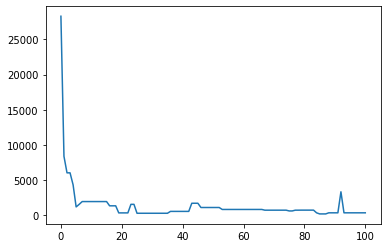

In [17]:
ga_a.n_next_generations(100)
ga_a.show_status()
plot_indices_to_sum(ga_a.best_indices_per_gen)
# plt.plot(ga_a.average_sum_per_gen)

generation_count 1000
average_sum 133178.53
best_sum 4
curr_best_sum 4


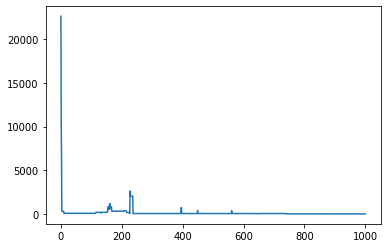

In [ ]:
ga_b.n_next_generations(100)
ga_b.show_status()
plot_indices_to_sum(ga_b.best_indices_per_gen)
# plt.plot(ga_b.average_sum_per_gen)

### Analiza mutation_ratio

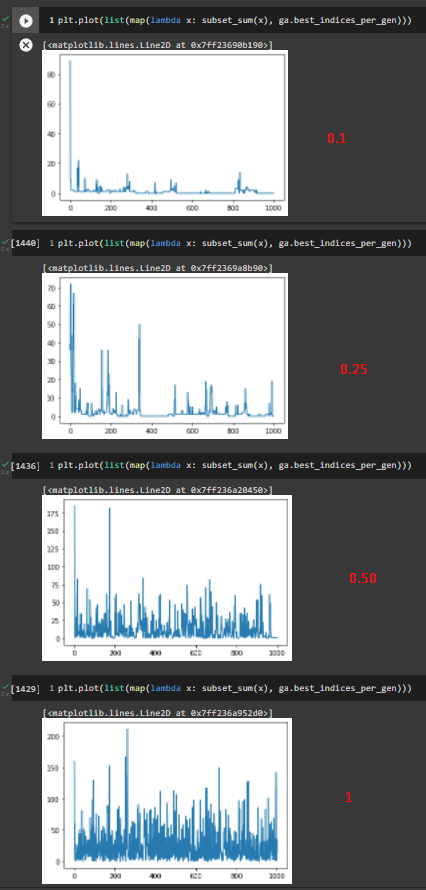

In [9]:
class GA_island:
  def __init__(self, island_count, migration_speed, migration_pause, *args):
    self.generation_count = 0
    self.islands = [GA(*args) for _ in range(island_count)]
    self.islad_count = island_count
    self.migration_speed = migration_speed
    self.migration_pause = migration_pause

  def migrate(self):
    for _ in range(self.migration_speed):
      emigrant = self.islands[-1].generation.pop()
      for ga in self.islands:
        ga.generation.add(emigrant)
        if ga != self.islands[-1]:
          emigrant = ga.generation.pop()

  def next_generations(self, n):
    end = False
    for _ in range(n):
      if end:
        break
      if self.generation_count % self.migration_pause == 0:
        self.migrate()
      for ga in self.islands:
        ga.next_generation()
        if ga.end_condition(ga):
          print('found solution:', ga.best_index)
          end = True
          break
      self.generation_count += 1

  def get_best_overall(self):
    best_arr = list(map(lambda ga: subset_sum(ga.best_index), self.islands))
    best_overall = min(best_arr)
    return best_overall

  def show_status(self):
    for i,ga in enumerate(self.islands):
      print(i)
      ga.show_status()
      print()

ga_islands = GA_island(10, 5, 10, 100, 0.1, crossover_b, mutate_b, end_condition_a, fitness_function_a)
# list(map(lambda x: x.generation, ga_islands.islands))

In [11]:
ga_islands.next_generations(100)
# ga_islands.show_status()
print(ga_islands.generation_count)
ga_islands.get_best_overall()

339


1